<a href="https://colab.research.google.com/github/ibzan79/BEDU/blob/main/fase_3_mod_1_proyecto_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto BEDU - Fase III - Módulo 1 - Análisis de Datos con Python Santander 2021

**Equipo 9:**
- Dávila Osorio Javier Ibzan 
- Díaz Lievano Lázaro Raúl
- García Ruiz Diana Isabel
- Ortega Estrada Ismael
- Pizano Ocampo Aranza Nayeli
- Sánchez Loperena Rubén

## Importación de librerías

In [103]:
import pandas as pd

from scipy import stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

import pprint as pp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate

import plotly.express as px

from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
nltk.download('vader_lexicon')

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import roc_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Dataset 

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/enfermedades_cardiovasculares.csv', index_col = 0)

df.head()

edad  genero  estatura  ...  alcohol  act_fisica  enfermedad_cardiovascular
0    50       2       168  ...        0           1                          0
1    55       1       156  ...        0           1                          1
2    51       1       165  ...        0           0                          1
3    48       2       169  ...        0           1                          1
4    47       1       156  ...        0           0                          0

[5 rows x 13 columns]

## Postwork 1 - Estimados de locación y variabilidad

* Identifica las columnas de tu dataset que tengan datos numéricos.
    - edad
    - estatura
    - peso
    - imc
    - presion_sistolica
    - presion_diastolica


In [14]:
est_loc = df.describe().T

est_loc = est_loc.drop(index = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica', 'enfermedad_cardiovascular'], columns = ['count'])

est_loc

mean         std     min  ...      50%     75%       max
edad                 52.840671    6.766774   29.00  ...   53.000   58.00     64.00
estatura            164.359229    8.210126   55.00  ...  165.000  170.00    250.00
peso                 74.205690   14.395757   10.00  ...   72.000   82.00    200.00
imc                  27.556545    6.091405    3.47  ...   26.375   30.22    298.67
presion_sistolica   128.817286  154.011419 -150.00  ...  120.000  140.00  16020.00
presion_diastolica   96.630414  188.472530  -70.00  ...   80.000   90.00  11000.00

[6 rows x 7 columns]

In [15]:
variables_numericas = ['edad', 'estatura', 'peso', 'imc', 'presion_sistolica', 'presion_diastolica']
columnas = ['promedio', 'mediana', 'media_truncada', 'desviacion_estandar', 'rango', '25%', '50%', '75%', 'rango_intercuartil']

estimados_loc = pd.DataFrame(index = variables_numericas)

datos = []

for columna in columnas:
    if columna == 'promedio':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].mean())
        estimados_loc.insert(0, column = columna, value = datos)
    elif columna == 'mediana':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].median())
        estimados_loc.insert(1, column = columna, value = datos)
    elif columna == 'media_truncada':
        for i in range(len(variables_numericas)):
            datos.append(stats.trim_mean(df[variables_numericas[i]], 0.1))
        estimados_loc.insert(2, column = columna, value = datos)
    elif columna == 'desviacion_estandar':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].std())
        estimados_loc.insert(3, column = columna, value = datos)
    elif columna == 'rango':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].max() - df[variables_numericas[i]].min())
        estimados_loc.insert(4, column = columna, value = datos)
    elif columna == '25%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(5, column = columna, value = datos)
    elif columna == '50%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.5))
        estimados_loc.insert(6, column = columna, value = datos)
    elif columna == '75%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.75))
        estimados_loc.insert(7, column = columna, value = datos)
    elif columna == 'rango_intercuartil':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.75) - df[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(8, column = columna, value = datos)
    datos = []

estimados_loc

promedio  mediana  ...     75%  rango_intercuartil
edad                 52.840671   53.000  ...   58.00               10.00
estatura            164.359229  165.000  ...  170.00               11.00
peso                 74.205690   72.000  ...   82.00               17.00
imc                  27.556545   26.375  ...   30.22                6.34
presion_sistolica   128.817286  120.000  ...  140.00               20.00
presion_diastolica   96.630414   80.000  ...   90.00               10.00

[6 rows x 9 columns]

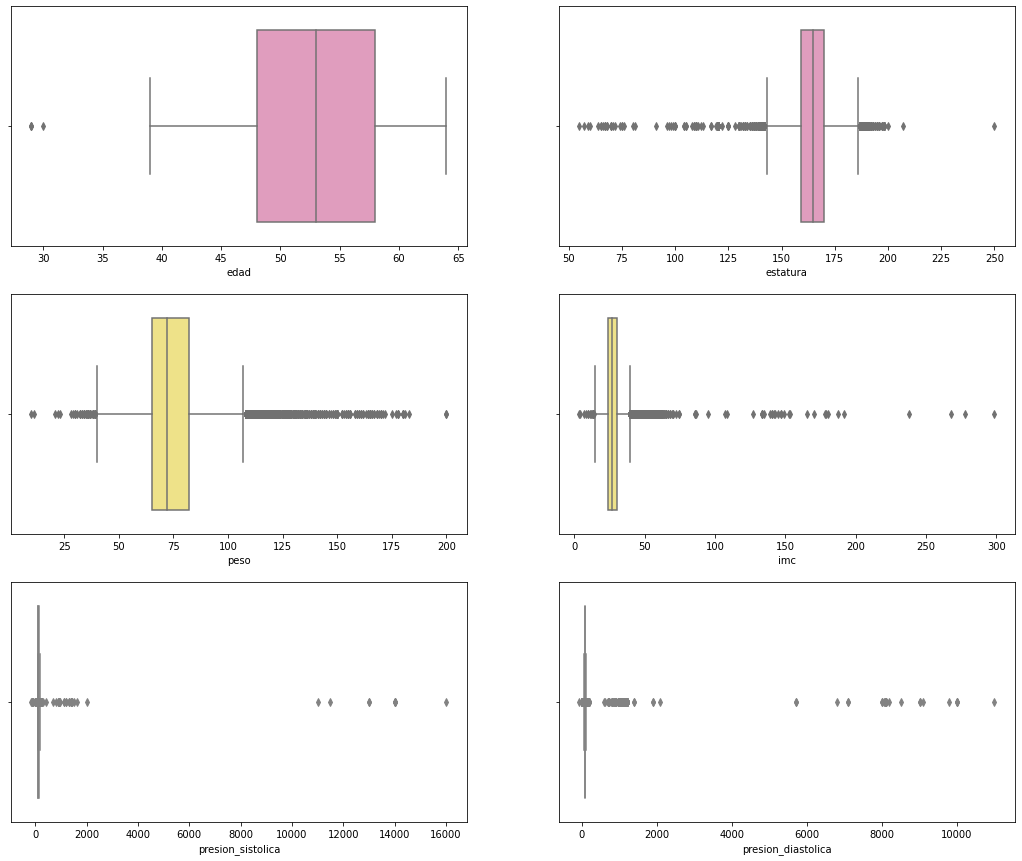

In [5]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

palette = ['#EB92BE', '#FFEF78', '#B1FFFD']

sns.boxplot(x = df['edad'], ax = axes[0, 0], color = palette[0]);
sns.boxplot(x = df['estatura'], ax = axes[0, 1], color = palette[0]);
sns.boxplot(x = df['peso'], ax = axes[1, 0], color = palette[1]);
sns.boxplot(x = df['imc'], ax = axes[1, 1], color = palette[1]);
sns.boxplot(x = df['presion_sistolica'], ax = axes[2, 0], color = palette[2]);
sns.boxplot(x = df['presion_diastolica'], ax = axes[2, 1], color = palette[2]);

In [6]:
df.describe().T

count        mean  ...     75%       max
edad                       70000.0   52.840671  ...   58.00     64.00
genero                     70000.0    1.349571  ...    2.00      2.00
estatura                   70000.0  164.359229  ...  170.00    250.00
peso                       70000.0   74.205690  ...   82.00    200.00
imc                        70000.0   27.556545  ...   30.22    298.67
presion_sistolica          70000.0  128.817286  ...  140.00  16020.00
presion_diastolica         70000.0   96.630414  ...   90.00  11000.00
colesterol                 70000.0    1.366871  ...    2.00      3.00
glucosa                    70000.0    1.226457  ...    1.00      3.00
tabaco                     70000.0    0.088129  ...    0.00      1.00
alcohol                    70000.0    0.053771  ...    0.00      1.00
act_fisica                 70000.0    0.803729  ...    1.00      1.00
enfermedad_cardiovascular  70000.0    0.499700  ...    1.00      1.00

[13 rows x 8 columns]

In [16]:
def filtro_IQR(serie):
  iqr = serie.quantile(0.75) - serie.quantile(0.25)
  filtrado = (serie > serie.quantile(0.25) - (iqr * 1.5)) & (serie < serie.quantile(0.75) + (iqr * 1.5))
  return filtrado

In [17]:
df_final = df.copy()

for columna in variables_numericas:
    df_final = df_final[filtro_IQR(df_final[columna])]

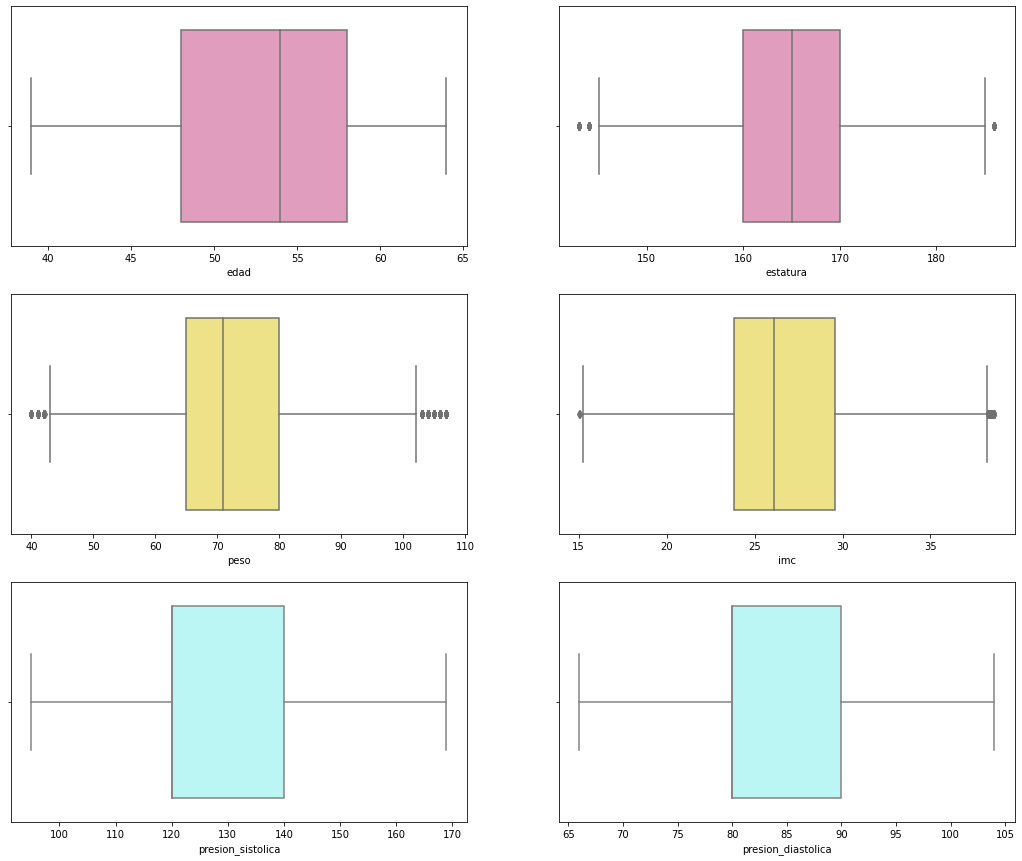

In [9]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

sns.boxplot(x = df_final['edad'], ax = axes[0, 0], color = palette[0]);
sns.boxplot(x = df_final['estatura'], ax = axes[0, 1], color = palette[0]);
sns.boxplot(x = df_final['peso'], ax = axes[1, 0], color = palette[1]);
sns.boxplot(x = df_final['imc'], ax = axes[1, 1], color = palette[1]);
sns.boxplot(x = df_final['presion_sistolica'], ax = axes[2, 0], color = palette[2]);
sns.boxplot(x = df_final['presion_diastolica'], ax = axes[2, 1], color = palette[2]);

In [130]:
df_final.describe().T

count        mean  ...     75%     max
edad                       60646.0   52.872819  ...   58.00   64.00
genero                     60646.0    1.354731  ...    2.00    2.00
estatura                   60646.0  164.581209  ...  170.00  186.00
peso                       60646.0   72.693673  ...   80.00  107.00
imc                        60646.0   26.858322  ...   29.59   38.63
presion_sistolica          60646.0  126.046120  ...  140.00  169.00
presion_diastolica         60646.0   81.585892  ...   90.00  104.00
colesterol                 60646.0    1.350477  ...    1.00    3.00
glucosa                    60646.0    1.217574  ...    1.00    3.00
tabaco                     60646.0    0.087541  ...    0.00    1.00
alcohol                    60646.0    0.052188  ...    0.00    1.00
act_fisica                 60646.0    0.804670  ...    1.00    1.00
enfermedad_cardiovascular  60646.0    0.488276  ...    1.00    1.00

[13 rows x 8 columns]

In [131]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60646 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       60646 non-null  int64  
 1   genero                     60646 non-null  int64  
 2   estatura                   60646 non-null  int64  
 3   peso                       60646 non-null  float64
 4   imc                        60646 non-null  float64
 5   presion_sistolica          60646 non-null  int64  
 6   presion_diastolica         60646 non-null  int64  
 7   colesterol                 60646 non-null  int64  
 8   glucosa                    60646 non-null  int64  
 9   tabaco                     60646 non-null  int64  
 10  alcohol                    60646 non-null  int64  
 11  act_fisica                 60646 non-null  int64  
 12  enfermedad_cardiovascular  60646 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 9.0 MB


* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

In [132]:
for columna in variables_numericas:
    segmentos = pd.cut(df_final[columna], 10)
    print(f'Tabla de frecuencias de:')
    #print(f'{df_final[columna].groupby(segmentos).count()}\n\n')
    pp.pprint(df_final[columna].groupby(segmentos).count())
    print('\n\n')

Tabla de frecuencias de:
edad
(38.975, 41.5]    4508
(41.5, 44.0]      4271
(44.0, 46.5]      3195
(46.5, 49.0]      6430
(49.0, 51.5]      5718
(51.5, 54.0]      9377
(54.0, 56.5]      6550
(56.5, 59.0]      9287
(59.0, 61.5]      5135
(61.5, 64.0]      6175
Name: edad, dtype: int64



Tabla de frecuencias de:
estatura
(142.957, 147.3]      497
(147.3, 151.6]       1860
(151.6, 155.9]       4326
(155.9, 160.2]      12831
(160.2, 164.5]       9496
(164.5, 168.8]      13405
(168.8, 173.1]      10721
(173.1, 177.4]       4378
(177.4, 181.7]       2352
(181.7, 186.0]        780
Name: estatura, dtype: int64



Tabla de frecuencias de:
peso
(39.933, 46.7]      340
(46.7, 53.4]       1833
(53.4, 60.1]       7201
(60.1, 66.8]      10351
(66.8, 73.5]      14423
(73.5, 80.2]      12102
(80.2, 86.9]       6270
(86.9, 93.6]       4734
(93.6, 100.3]      2530
(100.3, 107.0]      862
Name: peso, dtype: int64



Tabla de frecuencias de:
imc
(15.016, 17.399]      160
(17.399, 19.758]     1092
(19.758

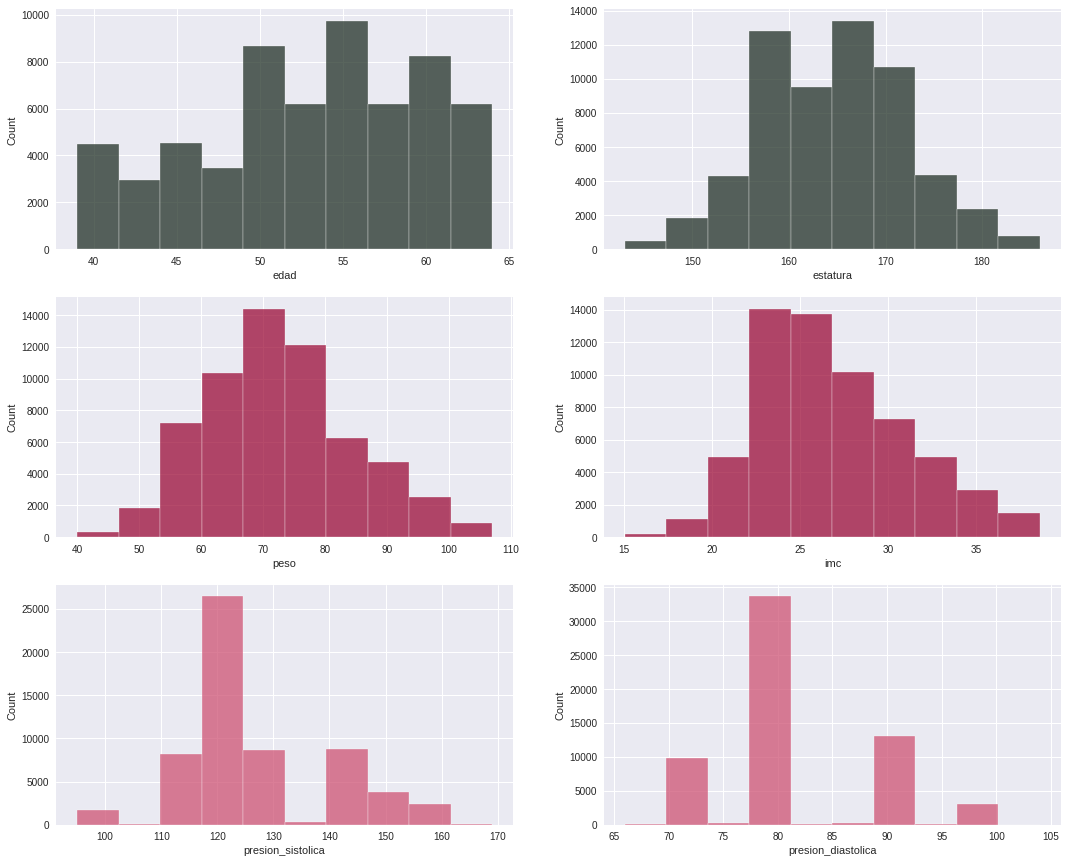

In [145]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

b = 10

sns.histplot(df_final['edad'], ax = axes[0, 0], color = palette[0], bins = b);
sns.histplot(df_final['estatura'], ax = axes[0, 1], color = palette[0], bins = b);
sns.histplot(df_final['peso'], ax = axes[1, 0], color = palette[1], bins = b);
sns.histplot(df_final['imc'], ax = axes[1, 1], color = palette[1], bins = b);
sns.histplot(df_final['presion_sistolica'], ax = axes[2, 0], color = palette[2], bins = b);
sns.histplot(df_final['presion_diastolica'], ax = axes[2, 1], color = palette[2], bins = b);

In [134]:
for columna in variables_numericas:
    print(f'Variable: "{columna}"')
    print(f'  - Curtosis: {kurtosis(df_final[columna])}')
    print(f'  - Asimetría: {skew(df_final[columna])}\n')

Variable: "edad"
  - Curtosis: -0.8146140960101342
  - Asimetría: -0.3080328194907456

Variable: "estatura"
  - Curtosis: -0.20330168866493326
  - Asimetría: 0.061574325519162074

Variable: "peso"
  - Curtosis: -0.1712200061859015
  - Asimetría: 0.3530246120129392

Variable: "imc"
  - Curtosis: -0.19248793142271703
  - Asimetría: 0.5237602333493007

Variable: "presion_sistolica"
  - Curtosis: 0.04182751309558208
  - Asimetría: 0.6988873669829082

Variable: "presion_diastolica"
  - Curtosis: 0.10324957761354359
  - Asimetría: 0.4543878916359017



* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

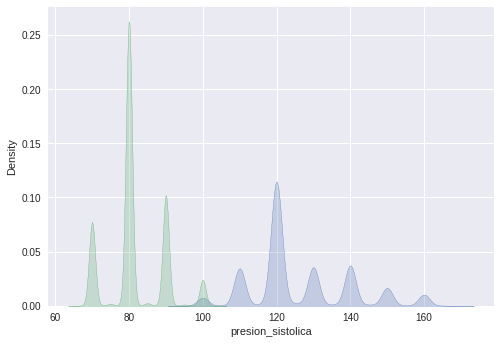

In [135]:
sns.kdeplot(df_final['presion_sistolica'], fill = True);
sns.kdeplot(df_final['presion_diastolica'], fill = True);

# Explicación de las presiones altas y bajas

## Postwork 3.

* Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
* Identifica todas las variables categóricas en tu dataset.
    * Género.
    * Colesterol.
    * Glucosa.
    * Tabaco.
    * Alcohol.
    * Actividad física.
    * Enfermedad cardiovascular.
* Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.


In [67]:
var_categoricas = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica', 'enfermedad_cardiovascular']
conteos = []

for columna in var_categoricas:
    conteos.append(df_final[columna].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

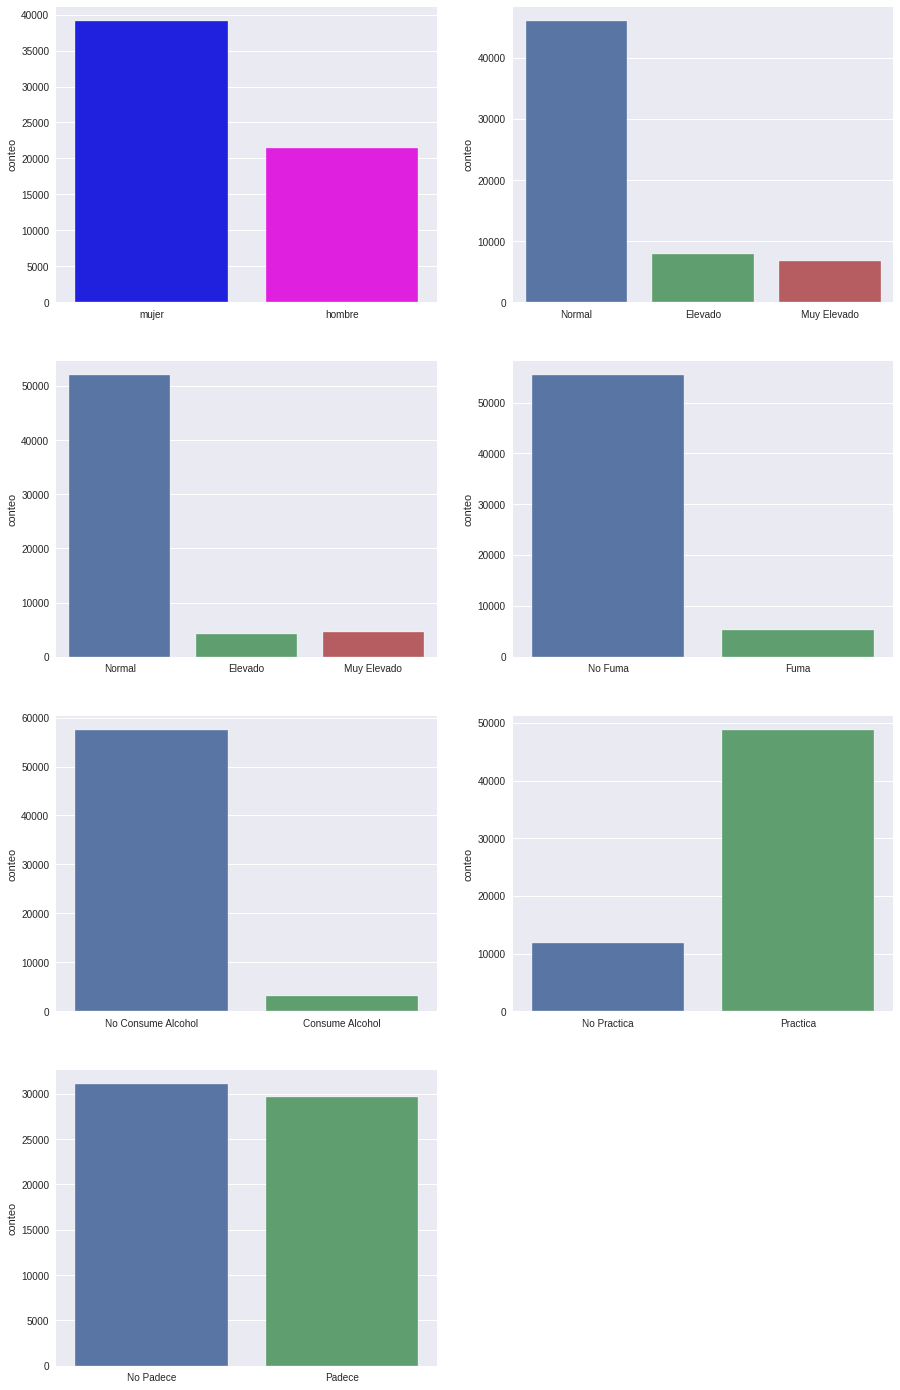

In [136]:
fig_2 = plt.figure(figsize = (15, 25))
axes = fig_2.subplots(4, 2, sharex = False, sharey = False)

g = sns.barplot(conteos[0].index, conteos[0], ax = axes[0, 0], palette = ['#0000FF', '#FF00FF']);
g.set(ylabel = 'conteo')
g.set_xticklabels(labels = ['mujer', 'hombre'])

c = sns.barplot(conteos[1].index, conteos[1], ax = axes[0, 1]);
c.set(ylabel = 'conteo')
c.set_xticklabels(labels = ['Normal', 'Elevado', 'Muy Elevado'])

gl = sns.barplot(conteos[2].index, conteos[2], ax = axes[1, 0]);
gl.set(ylabel = 'conteo')
gl.set_xticklabels(labels = ['Normal', 'Elevado', 'Muy Elevado'])

t = sns.barplot(conteos[3].index, conteos[3], ax = axes[1, 1]);
t.set(ylabel = 'conteo')
t.set_xticklabels(labels = ['No Fuma', 'Fuma'])

a = sns.barplot(conteos[4].index, conteos[4], ax = axes[2, 0]);
a.set(ylabel = 'conteo')
a.set_xticklabels(labels = ['No Consume Alcohol', 'Consume Alcohol'])

af = sns.barplot(conteos[5].index, conteos[5], ax = axes[2, 1]);
af.set(ylabel = 'conteo')
af.set_xticklabels(labels = ['No Practica', 'Practica'])

ec = sns.barplot(conteos[6].index, conteos[6], ax = axes[3, 0]);
ec.set(ylabel = 'conteo')
ec.set_xticklabels(labels = ['No Padece', 'Padece'])

axes[3, 1].set_axis_off()

Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

* genero - enfermedad cardiovascular
* colesterol - enfermedad cardiovascular
* glucosa - enfermedad cardiovascular
* tabaco - enfermedad cardiovascular
* alcohol - enfermedad cardiovascular
* actividad física - enfermedad cardiovascular

In [143]:
def porcentajes (abs_values):
  rel_values = abs_values / abs_values.sum(axis=1, keepdims = True) * 100
  labels=zip(abs_values.T.flatten(), rel_values.T.flatten())
  for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x = x + width / 2, y = y + height / 2, s = label, horizontalalignment = 'center', verticalalignment = 'center')

In [177]:
def personalizar_crosstab(ax, titulo, ylabel, xlabel, bgrid):
  ax.set_title(titulo, fontsize = 25);
  ax.set_ylabel(ylabel, fontsize = 20);
  ax.set_xlabel(xlabel, fontsize = 20)
  ax.grid(bgrid)
  abs_values = df_generado.values
  porcentajes(abs_values);

enfermedad_cardiovascular      0      1  total
genero                                        
1                          20010  19123  39133
2                          11024  10489  21513
total                      31034  29612  60646 




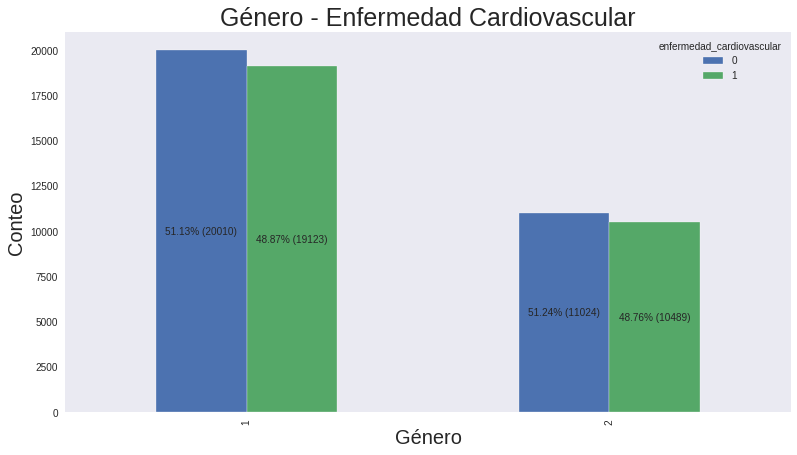

In [179]:
print(pd.crosstab(df_final['genero'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['genero'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7));
personalizar_crosstab(ax, 'Género - Enfermedad Cardiovascular', 'Conteo', 'Género', bgrid = False);

enfermedad_cardiovascular      0      1  total
colesterol                                    
1                          26175  19911  46086
2                           3234   4631   7865
3                           1625   5070   6695
total                      31034  29612  60646 




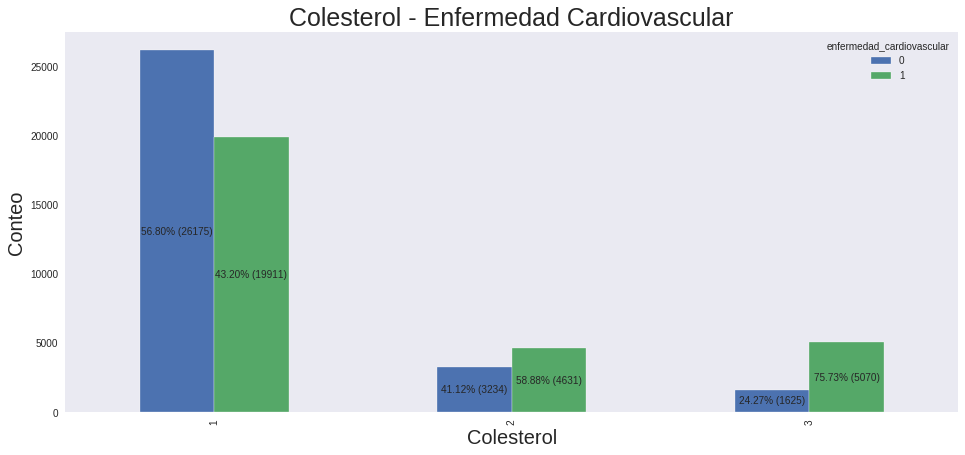

In [181]:
c = 'colesterol'
print(pd.crosstab(df_final['colesterol'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['colesterol'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (16, 7));
personalizar_crosstab(ax, 'Colesterol - Enfermedad Cardiovascular', 'Conteo', 'Colesterol', bgrid = False);

enfermedad_cardiovascular      0      1  total
glucosa                                       
1                          27499  24469  51968
2                           1777   2384   4161
3                           1758   2759   4517
total                      31034  29612  60646 




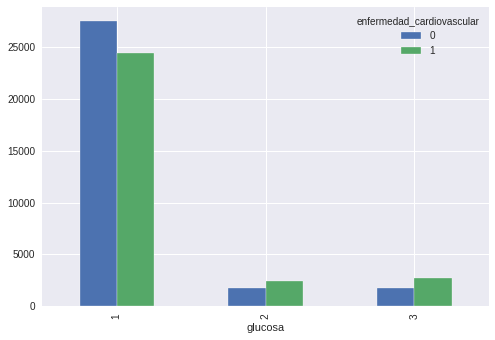

In [139]:
print(pd.crosstab(df_final['glucosa'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['glucosa'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
tabaco                                        
0                          28137  27200  55337
1                           2897   2412   5309
total                      31034  29612  60646 




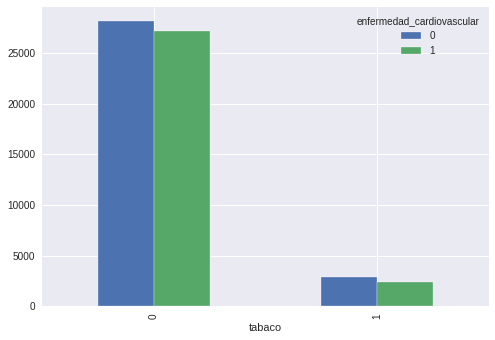

In [140]:
print(pd.crosstab(df_final['tabaco'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['tabaco'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
alcohol                                       
0                          29326  28155  57481
1                           1708   1457   3165
total                      31034  29612  60646 




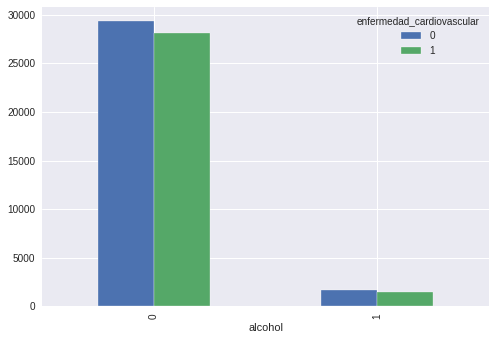

In [141]:
print(pd.crosstab(df_final['alcohol'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['alcohol'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
act_fisica                                    
0                           5618   6228  11846
1                          25416  23384  48800
total                      31034  29612  60646 




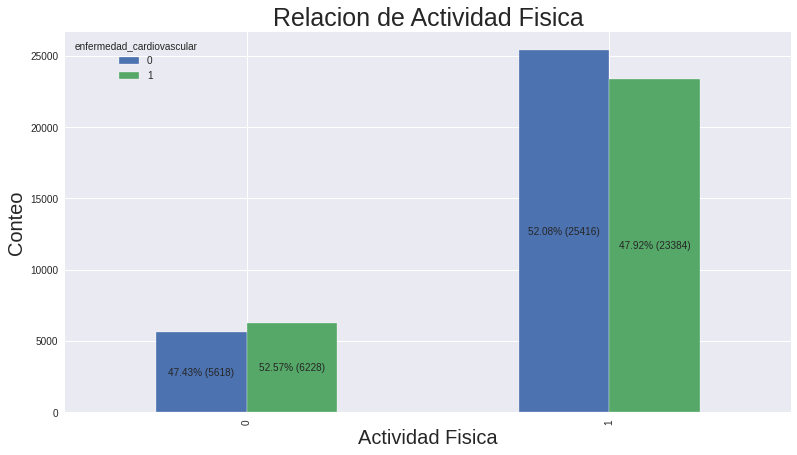

In [144]:
print(pd.crosstab(df_final['act_fisica'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['act_fisica'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7));
ax.set_title("Relacion de Actividad Fisica", fontsize = 25);
ax.set_ylabel("Conteo", fontsize = 20);
ax.set_xlabel("Actividad Fisica", fontsize = 20)
ax.grid(True)

abs_values = df_generado.values

porcentajes(abs_values)

enfermedad_cardiovascular      0      1
genero tabaco                          
1      0                   19652  18814
       1                     358    309
2      0                    8485   8386
       1                    2539   2103 




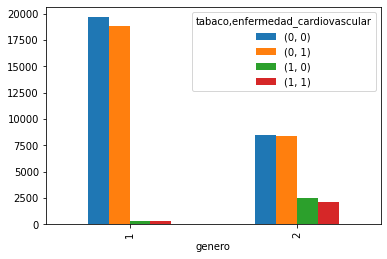

In [ ]:
x = pd.crosstab(df_final['genero'], [df_final['tabaco'], df_final['enfermedad_cardiovascular']])
x = x.stack(level = 0)

print(x, '\n\n')

pd.crosstab(df_final['genero'], [df_final['tabaco'], df_final['enfermedad_cardiovascular']]).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1
genero alcohol                         
1      0                   19514  18669
       1                     496    454
2      0                    9812   9486
       1                    1212   1003 




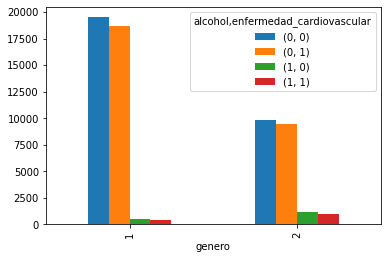

In [ ]:
x = pd.crosstab(df_final['genero'], [df_final['alcohol'], df_final['enfermedad_cardiovascular']])
x = x.stack(level = 0)

print(x, '\n\n')

pd.crosstab(df_final['genero'], [df_final['alcohol'], df_final['enfermedad_cardiovascular']]).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1
genero act_fisica                      
1      0                    3710   4016
       1                   16300  15107
2      0                    1908   2212
       1                    9116   8277 




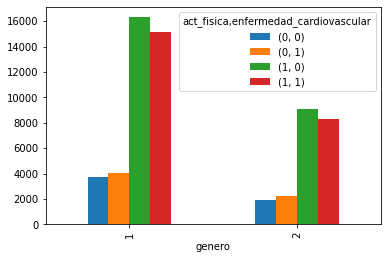

In [ ]:
x = pd.crosstab(df_final['genero'], [df_final['act_fisica'], df_final['enfermedad_cardiovascular']])
x = x.stack(level = 0)

print(x, '\n\n')

pd.crosstab(df_final['genero'], [df_final['act_fisica'], df_final['enfermedad_cardiovascular']]).plot.bar(stacked = False);

* edad - enfermedad cardiovascular
* imc - glucosa
* imc - colesterol
* imc - enfermedad cardiovascular
* presion diastolica - enfermedad cardiovascular

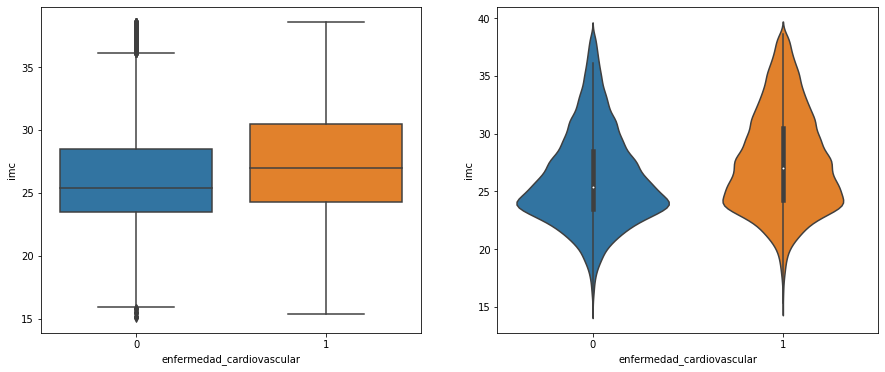

In [ ]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'imc', ax = axes[0]);
sns.violinplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'imc', ax = axes[1]);

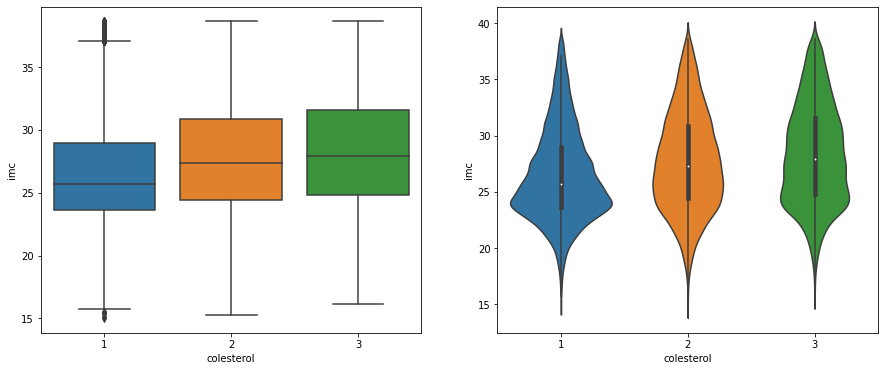

In [ ]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'colesterol', y = 'imc', ax = axes[0]);
sns.violinplot(data = df_final, x = 'colesterol', y = 'imc', ax = axes[1]);

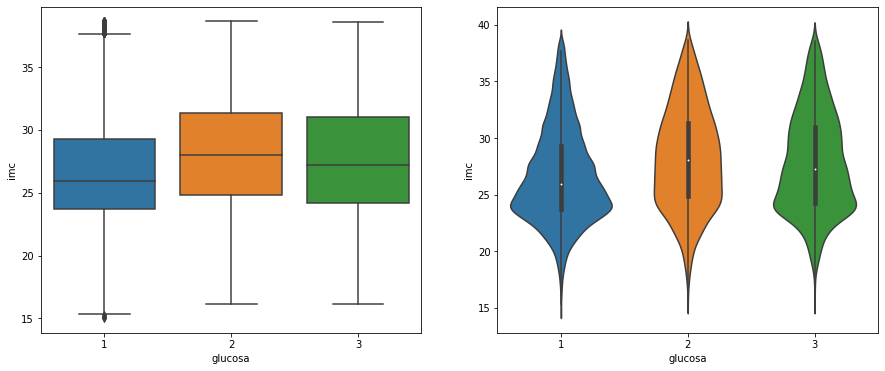

In [ ]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'glucosa', y = 'imc', ax = axes[0]);
sns.violinplot(data = df_final, x = 'glucosa', y = 'imc', ax = axes[1]);

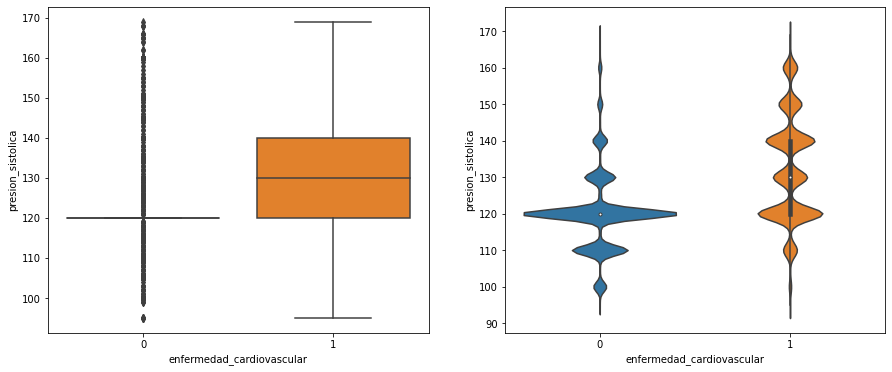

In [ ]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'presion_sistolica', ax = axes[0]);
sns.violinplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'presion_sistolica', ax = axes[1]);

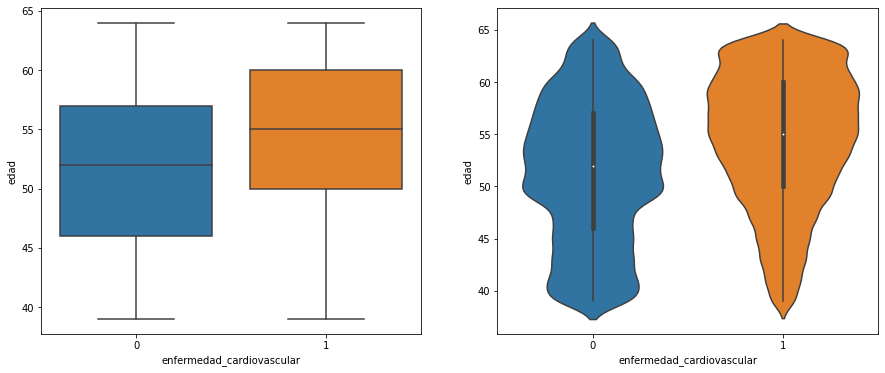

In [ ]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'edad', ax = axes[0]);
sns.violinplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'edad', ax = axes[1]);

## Postwork 4.

In [ ]:
df_num = df.drop(columns = ['genero', 'colesterol', 'alcohol', 'glucosa', 'tabaco', 'act_fisica', 'enfermedad_cardiovascular'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       70000 non-null  int64  
 1   genero                     70000 non-null  int64  
 2   estatura                   70000 non-null  int64  
 3   peso                       70000 non-null  float64
 4   imc                        70000 non-null  float64
 5   presion_sistolica          70000 non-null  int64  
 6   presion_diastolica         70000 non-null  int64  
 7   colesterol                 70000 non-null  int64  
 8   glucosa                    70000 non-null  int64  
 9   tabaco                     70000 non-null  int64  
 10  alcohol                    70000 non-null  int64  
 11  act_fisica                 70000 non-null  int64  
 12  enfermedad_cardiovascular  70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.5 MB


### Matriz de correlaciones de los valores completos.

In [ ]:
df_num.corr()

edad  estatura  ...  presion_sistolica  presion_diastolica
edad                1.000000 -0.081506  ...           0.020854            0.017620
estatura           -0.081506  1.000000  ...           0.005488            0.006150
peso                0.053561  0.290968  ...           0.030702            0.043710
imc                 0.085403 -0.290642  ...           0.024851            0.035344
presion_sistolica   0.020854  0.005488  ...           1.000000            0.016086
presion_diastolica  0.017620  0.006150  ...           0.016086            1.000000

[6 rows x 6 columns]

### Heatmap de los valores completos 

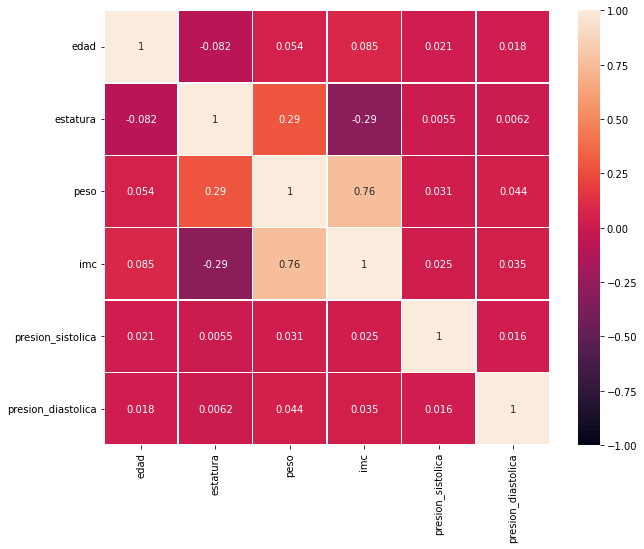

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5)

### Pairplot (relaciones entre variables numéricas) de los valores completos.

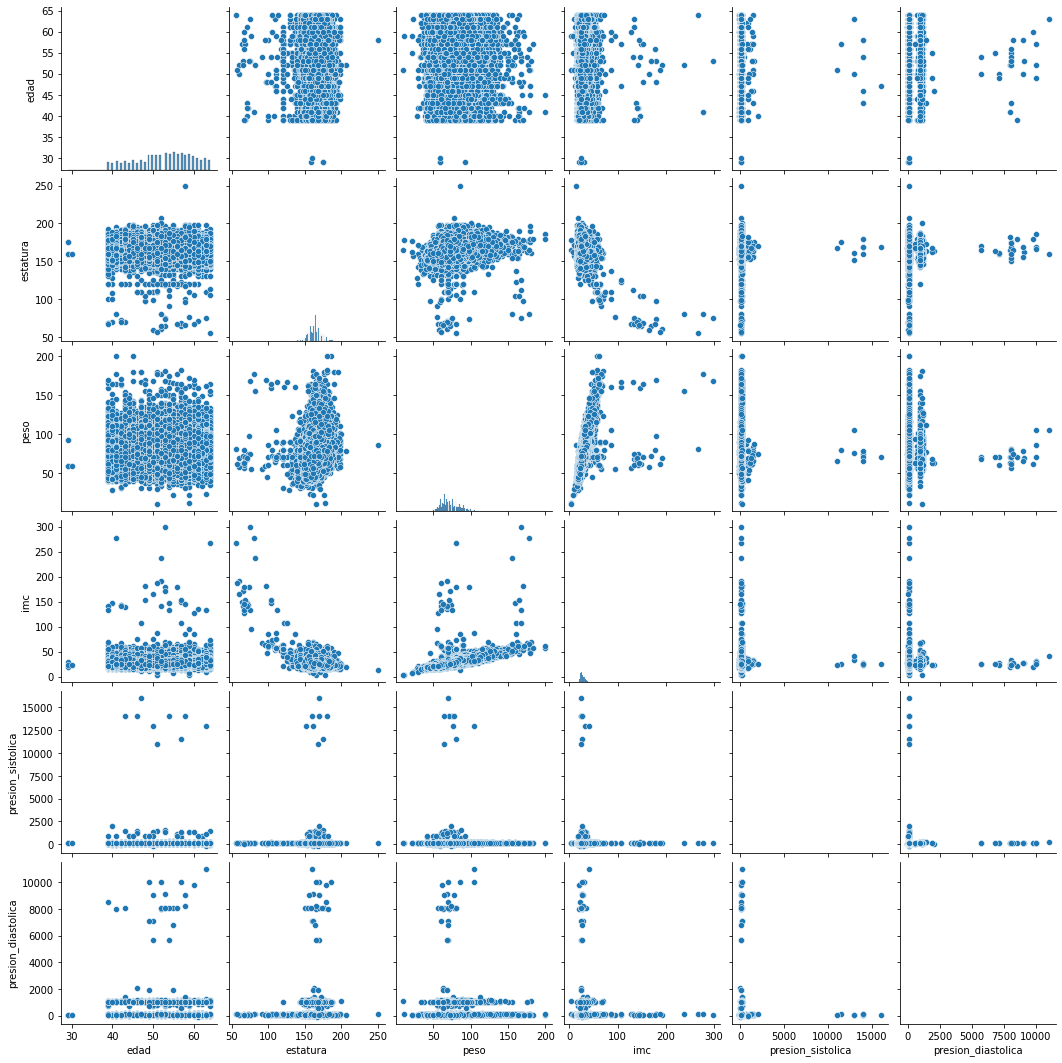

In [ ]:
sns.pairplot(df_num);

# Explicar sobre las presiones.

### Dataframe final

Quitamos los valores atípicos y tenemos como resultado el siguiente Dataframe

In [ ]:
df_final.head()

edad  genero  estatura  ...  alcohol  act_fisica  enfermedad_cardiovascular
0    50       2       168  ...        0           1                          0
1    55       1       156  ...        0           1                          1
2    51       1       165  ...        0           0                          1
3    48       2       169  ...        0           1                          1
5    60       1       151  ...        0           0                          0

[5 rows x 13 columns]

In [ ]:
df_final_num = df_final.drop(columns = ['genero', 'colesterol', 'alcohol', 'glucosa', 'tabaco', 'act_fisica', 'enfermedad_cardiovascular'])

### Matriz de correlaciones sin los valores atípicos.

In [ ]:
df_final_num.corr()

edad  estatura  ...  presion_sistolica  presion_diastolica
edad                1.000000 -0.091505  ...           0.201349            0.143918
estatura           -0.091505  1.000000  ...          -0.001605            0.015340
peso                0.049047  0.368141  ...           0.220683            0.203390
imc                 0.106569 -0.201687  ...           0.232543            0.204137
presion_sistolica   0.201349 -0.001605  ...           1.000000            0.702934
presion_diastolica  0.143918  0.015340  ...           0.702934            1.000000

[6 rows x 6 columns]

### Heatmap sin los valores atípicos.

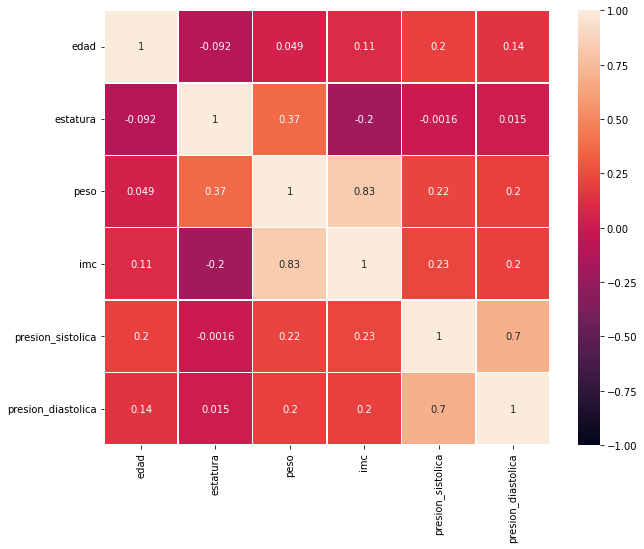

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_final_num.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5);

### Pairplot sin los valores atípicos.

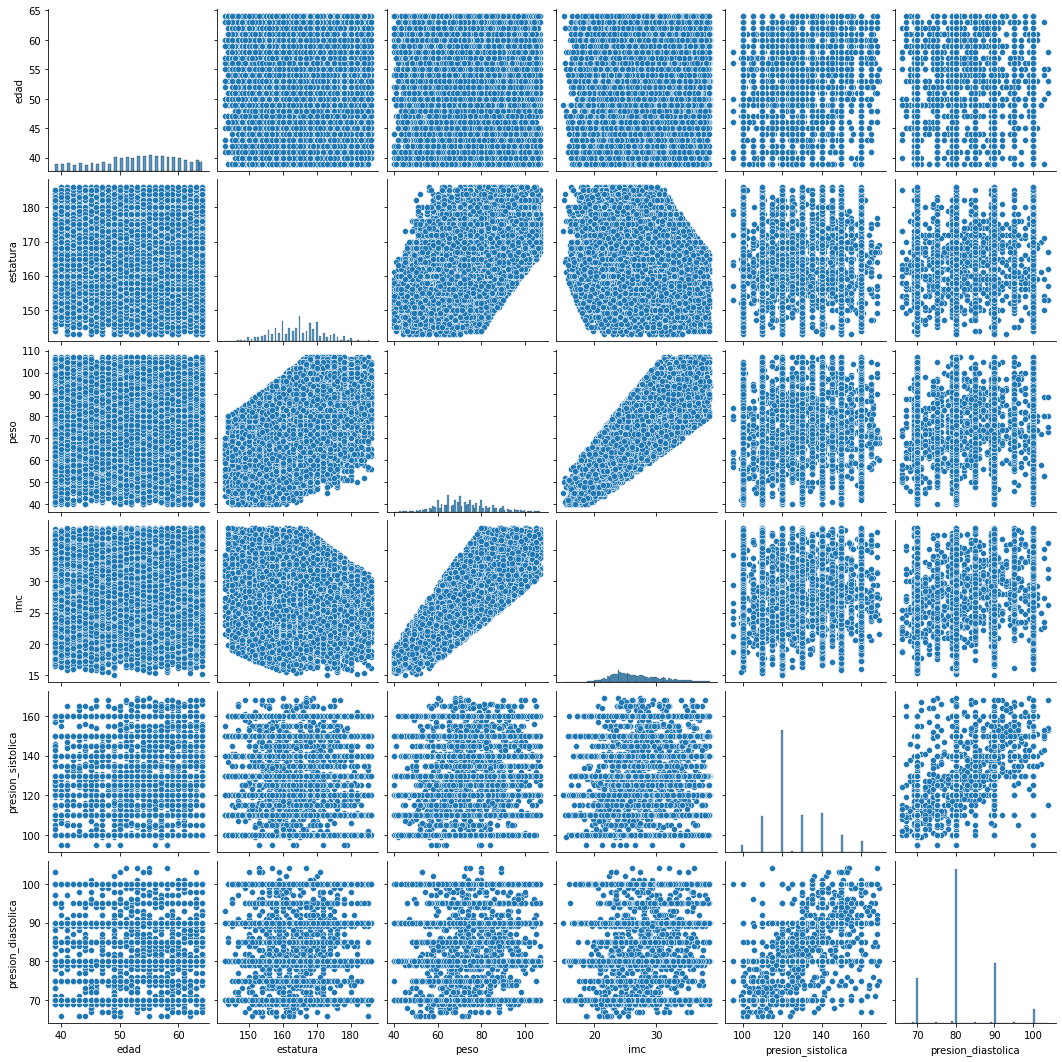

In [ ]:
sns.pairplot(df_final_num);

Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

* peso (i) - imc (d)
* estatura (i) - peso (d)
* imc (i) - presion_sistolica (d)

y = 0.5827163327298882 x + -23.210485745356635
R^2: 0.13552804955713948 




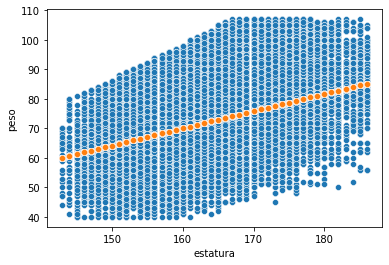

In [ ]:
lr = LinearRegression()
lr.fit(X = df_final['estatura'].to_frame(), y = df_final['peso'])

y_predict = lr.predict(df_final['estatura'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['estatura'].to_frame(), y = df_final['peso']), '\n\n')

sns.scatterplot(x = df_final['estatura'], y = df_final['peso']);
sns.scatterplot(x = df_final['estatura'], y = y_predict);

y = 0.756049647904232 x + 105.73989541506636
R^2: 0.054076304387463796 




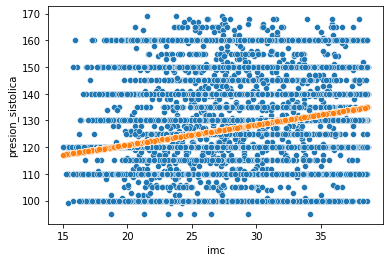

In [ ]:
lr = LinearRegression()
lr.fit(X = df_final['imc'].to_frame(), y = df_final['presion_sistolica'])

y_predict = lr.predict(df_final['imc'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['imc'].to_frame(), y = df_final['presion_sistolica']), '\n\n')

sns.scatterplot(x = df_final['imc'], y = df_final['presion_sistolica']);
sns.scatterplot(x = df_final['imc'], y = y_predict);

y = 0.2955341421612878 x + 5.374859507538854
R^2: 0.6934485347402611 




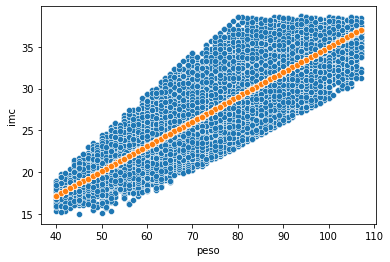

In [ ]:
lr = LinearRegression()
lr.fit(X = df_final['peso'].to_frame(), y = df_final['imc'])

y_predict = lr.predict(df_final['peso'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['peso'].to_frame(), y = df_final['imc']), '\n\n')

sns.scatterplot(x = df_final['peso'], y =df_final['imc']);
sns.scatterplot(x = df_final['peso'], y = y_predict);

## Postwork 5.

In [ ]:
estimados_loc

promedio  mediana  ...     75%  rango_intercuartil
edad                 52.840671   53.000  ...   58.00               10.00
estatura            164.359229  165.000  ...  170.00               11.00
peso                 74.205690   72.000  ...   82.00               17.00
imc                  27.556545   26.375  ...   30.22                6.34
presion_sistolica   128.817286  120.000  ...  140.00               20.00
presion_diastolica   96.630414   80.000  ...   90.00               10.00

[6 rows x 9 columns]

In [ ]:
def bootstrap(data):
    medias = []
    for i in range(100_000):
        muestra = data.sample(n = 1000, replace = True)
        medias.append(muestra.mean())                   
    return pd.Series(medias)

In [ ]:
# Falta poner títulos
def impresion(lista, columna):
    lim_inf = lista.quantile(0.025)
    lim_sup = lista.quantile(0.975)

    print(f'Mínimo: {lista.min()}')
    print(f'Máximo: {lista.max()}')
    print(f'Rango: {lista.max() - lista.min()}')
    print(f'Asimetría: {lista.skew()}')
    print(f'Curtosis: {lista.kurtosis()}')
    print(f'Error estándar: {lista.std()}')
    print(f'Intervalo de 95% confianza de la media: {lim_inf} < {columna.mean()} < {lim_sup}\n')

    sns.histplot(data = lista, color = '#FF3F00')
    plt.axvline(lim_inf, c = '#FAFF00')
    plt.axvline(lim_sup, c = '#FAFF00')

Mínimo: 51.91
Máximo: 53.793
Rango: 1.8830000000000027
Asimetría: -0.014631358924643697
Curtosis: 0.017558694778289752
Error estándar: 0.2127110230862547
Intervalo de 95% confianza de la media: 52.456 < 52.87281931207335 < 53.288



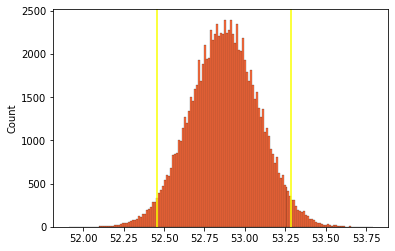

In [ ]:
impresion(bootstrap(df_final['edad']), df_final['edad'])

Mínimo: 163.499
Máximo: 165.569
Rango: 2.069999999999993
Asimetría: 0.002800352387561124
Curtosis: -0.008882778144791548
Error estándar: 0.23705198230945193

AxesSubplot(0.125,0.125;0.775x0.755)


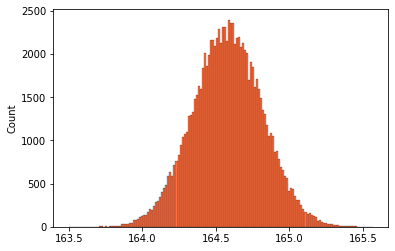

In [ ]:
impresion(bootstrap(df_final['estatura']), df_final['estatura'])

Mínimo: 71.1862
Máximo: 74.40379999999999
Rango: 3.2175999999999902
Asimetría: -0.0029624378610222236
Curtosis: 0.012918111802982857
Error estándar: 0.3738564809434958

AxesSubplot(0.125,0.125;0.775x0.755)


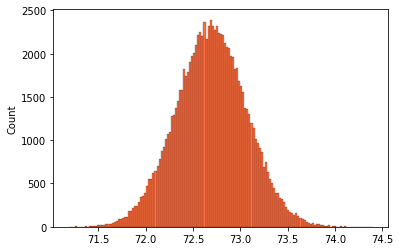

In [ ]:
impresion(bootstrap(df_final['peso']), df_final['peso'])

Mínimo: 26.297559999999987
Máximo: 27.477839999999983
Rango: 1.1802799999999962
Asimetría: 0.007273618874772048
Curtosis: 0.0030962893203008157
Error estándar: 0.132838655622925

AxesSubplot(0.125,0.125;0.775x0.755)


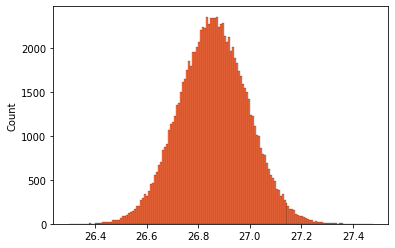

In [ ]:
impresion(bootstrap(df_final['imc']), df_final['imc'])

Mínimo: 80.569
Máximo: 82.63
Rango: 2.060999999999993
Asimetría: 0.015229335301778661
Curtosis: -0.02521155824331922
Error estándar: 0.23934097970490517

AxesSubplot(0.125,0.125;0.775x0.755)


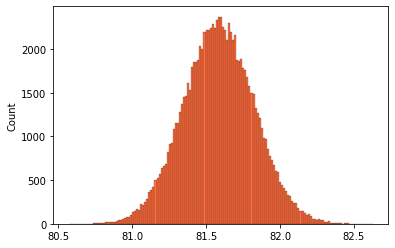

In [ ]:
impresion(bootstrap(df_final['presion_diastolica']), df_final['presion_diastolica'])

Mínimo: 123.833
Máximo: 127.829
Rango: 3.995999999999995
Asimetría: 0.015225820107681955
Curtosis: 0.01906040567732248
Error estándar: 0.43308283479891413

AxesSubplot(0.125,0.125;0.775x0.755)


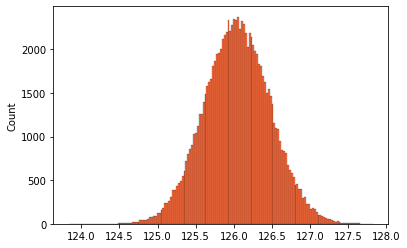

In [ ]:
impresion(bootstrap(df_final['presion_sistolica']), df_final['presion_sistolica'])

### Modelo de regresión linear múltiple. Número 1.

Variables:
- peso (i)
- estatura (i)
- imc (d)

In [ ]:
X = df_final[['peso', 'estatura']]
y = df_final[['imc']]

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_test, y_test)

0.9921896045670906

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
lr_2.score(X, y)

0.9922667030785207

### Validación cruzada número 1

In [ ]:
lr = LinearRegression()

scores = cross_validate(lr, X, y, scoring = 'r2')

scores

{'fit_time': array([0.00985312, 0.00894642, 0.0089047 , 0.00907087, 0.00877166]),
 'score_time': array([0.00207138, 0.00217414, 0.00213742, 0.00216413, 0.00224257]),
 'test_score': array([0.99220214, 0.99240054, 0.99253385, 0.99228302, 0.9919006 ])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.6f} +/- {scores["test_score"].std():.6f}')

Score del modelo: 0.992264 +/- 0.000213


### Modelo de regresión linear múltiple. Número 2.

Variables:
- peso (i)
- edad (i)
- presion_sistolica (d)

In [ ]:
X = df_final[['edad', 'peso', 'presion_diastolica']]
y = df_final[['presion_sistolica']]

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_test, y_test)

0.5094983318933974

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
lr_2.score(X, y)

0.5103445906627914

### Validación cruzada número 2

In [ ]:
lr = LinearRegression()

scores = cross_validate(lr, X, y, scoring = 'r2')

scores

{'fit_time': array([0.01102257, 0.00870013, 0.00980163, 0.00985336, 0.00987172]),
 'score_time': array([0.00593257, 0.00229883, 0.00231981, 0.00223875, 0.00242329]),
 'test_score': array([0.49263097, 0.52172141, 0.50301031, 0.52599093, 0.50776159])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.6f} +/- {scores["test_score"].std():.6f}')

Score del modelo: 0.510223 +/- 0.012234


## Postwork 6.

### Treemaps

In [18]:
df_gropuped = df_final[['enfermedad_cardiovascular','genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica']]

df_gropuped.head()

enfermedad_cardiovascular  genero  colesterol  ...  tabaco  alcohol  act_fisica
0                          0       2           1  ...       0        0           1
1                          1       1           3  ...       0        0           1
2                          1       1           3  ...       0        0           0
3                          1       2           1  ...       0        0           1
5                          0       1           2  ...       0        0           0

[5 rows x 7 columns]

In [19]:
df_gropuped['count'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [24]:
fig = px.treemap(df_gropuped, path = ['enfermedad_cardiovascular', 'genero','colesterol'], values = 'count')
fig.show()

In [25]:
fig = px.treemap(df_gropuped, path = ['enfermedad_cardiovascular', 'genero','glucosa'], values = 'count')
fig.show()

In [26]:
fig = px.treemap(df_gropuped, path = ['enfermedad_cardiovascular', 'genero','tabaco'], values = 'count')
fig.show()

In [27]:
fig = px.treemap(df_gropuped, path = ['enfermedad_cardiovascular', 'genero','alcohol'], values = 'count')
fig.show()

In [28]:
fig = px.treemap(df_gropuped, path = ['enfermedad_cardiovascular', 'genero','act_fisica'], values = 'count')
fig.show()

NameError: ignored

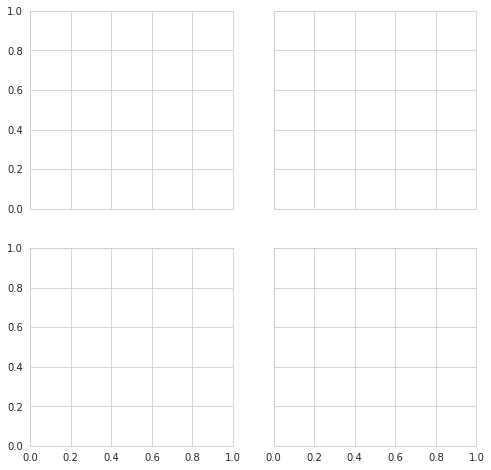

In [29]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(x = df_final['peso'], y = basket['weight'], hue=basket['sex'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x=volley['height'], y=volley['weight'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x=foot['height'], y=foot['weight'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(x=base['height'], y=base['weight'], ax=axes[1, 1], color=palette[3]);

axes[0, 0].set_title('Basketball')
axes[0, 1].set_title('Volleyball')
axes[1, 0].set_title('Football')
axes[1, 1].set_title('Baseball')

fig.suptitle('Relationship between height and weight in 4 sports', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

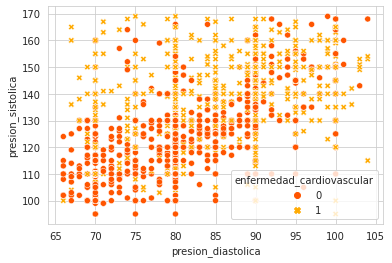

In [30]:
sns.scatterplot(x=df_final['presion_diastolica'], y=df_final['presion_sistolica'], hue=df_final['enfermedad_cardiovascular'], style=df_final['enfermedad_cardiovascular'], palette='autumn');

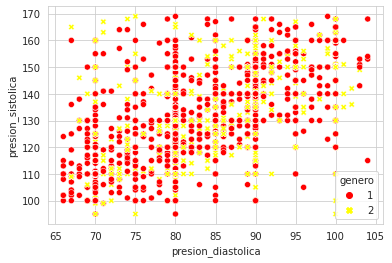

In [31]:
sns.scatterplot(x=df_final['presion_diastolica'], y=df_final['presion_sistolica'], hue=df_final['genero'], style=df_final['genero'], palette='autumn');

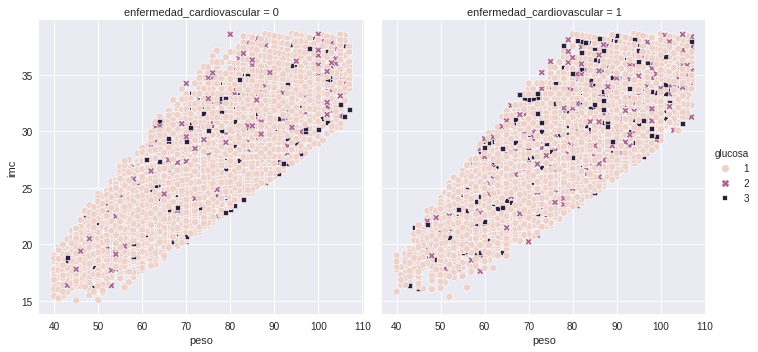

In [47]:
sns.relplot(data = df_final, x = 'peso', y = 'imc', kind='scatter', hue='glucosa', style='glucosa',col='enfermedad_cardiovascular', col_wrap=2, );

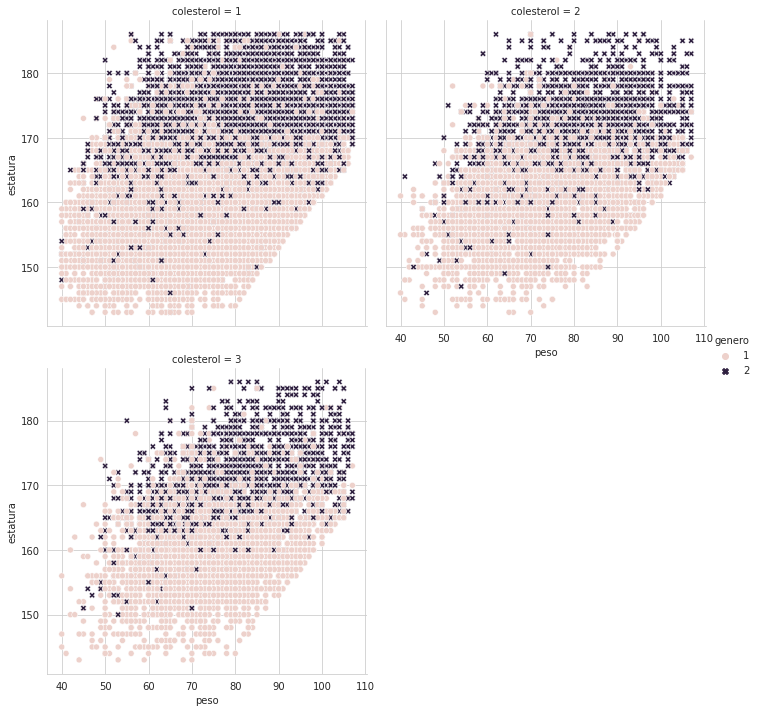

In [32]:
sns.relplot(data=df_final, x='peso', y='estatura', kind='scatter', hue='genero',style='genero',col='colesterol', col_wrap=2);

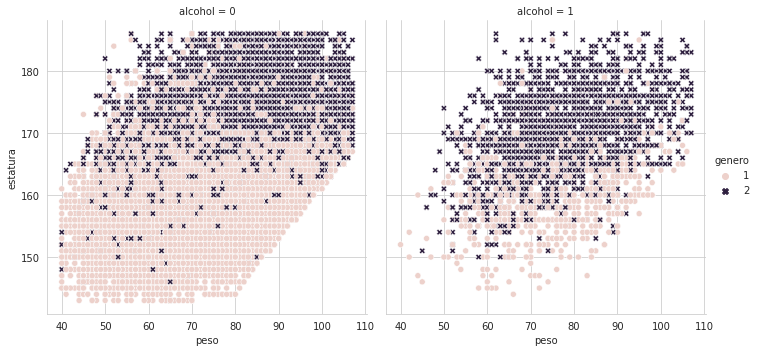

In [33]:
sns.relplot(data=df_final, x='peso', y='estatura', kind='scatter', hue='genero',style='genero',col='alcohol', col_wrap=2);

### Binnings Hexagonales

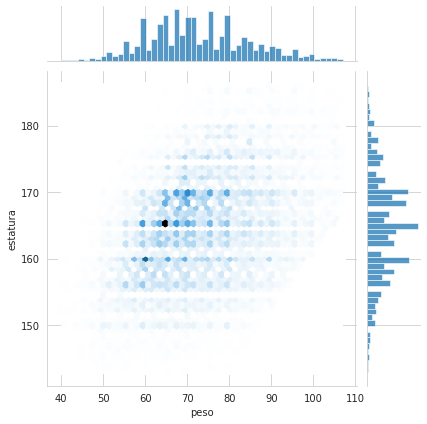

In [34]:
sns.jointplot(x='peso', y='estatura', data=df_final, kind='hex', ratio=5, joint_kws={'gridsize': 50}, marginal_kws={'bins':50});

### Barras apiladas

In [35]:
df_gropuped.head()

enfermedad_cardiovascular  genero  colesterol  ...  alcohol  act_fisica  count
0                          0       2           1  ...        0           1      1
1                          1       1           3  ...        0           1      1
2                          1       1           3  ...        0           0      1
3                          1       2           1  ...        0           1      1
5                          0       1           2  ...        0           0      1

[5 rows x 8 columns]

In [36]:
value_counts = df_gropuped.groupby(['enfermedad_cardiovascular', 'genero'])['count'].sum()
value_counts

enfermedad_cardiovascular  genero
0                          1         20010
                           2         11024
1                          1         19123
                           2         10489
Name: count, dtype: int64

In [37]:
value_counts = value_counts.unstack(1)
value_counts

genero                         1      2
enfermedad_cardiovascular              
0                          20010  11024
1                          19123  10489

[Text(0, 0, 'No padece'), Text(0, 0, 'Padece')]

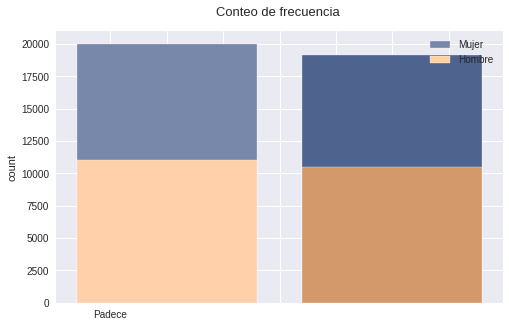

In [38]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts[1], label=1,
              color=["#7788AA","#4E638E"])
plt2 = ax.bar(value_counts.index, value_counts[2], label=2,
              color=["#FFD0AA","#D4996A"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia ', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Mujer', 'Hombre'));
ax.set_xticklabels(labels = ['No padece', 'Padece'])

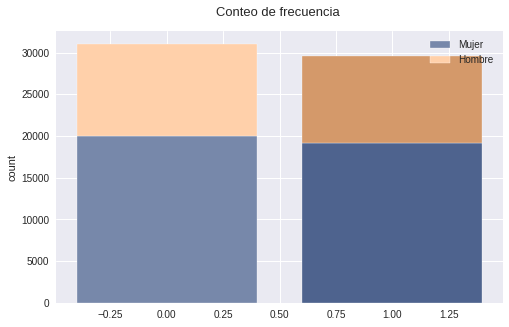

In [39]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts[1], label=1,
              color=["#7788AA","#4E638E"])
plt2 = ax.bar(value_counts.index, value_counts[2], bottom=value_counts[1],
              color=["#FFD0AA","#D4996A"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia ', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Mujer', 'Hombre'));
# ax.set_xticklabels(labels = ['No padece', 'Padece'])

## Postwork 7.

In [146]:
df_google = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/googleplaystore_user_reviews.csv', index_col = 0)

df_google.head()

Translated_Review  ... Sentiment_Subjectivity
App                                                                       ...                       
10 Best Foods for You  I like eat delicious food. That's I'm cooking ...  ...               0.533333
10 Best Foods for You    This help eating healthy exercise regular basis  ...               0.288462
10 Best Foods for You                                                NaN  ...                    NaN
10 Best Foods for You         Works great especially going grocery store  ...               0.875000
10 Best Foods for You                                       Best idea us  ...               0.300000

[5 rows x 4 columns]

In [147]:
df_google = df_google.dropna()

df_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Translated_Review       37427 non-null  object 
 1   Sentiment               37427 non-null  object 
 2   Sentiment_Polarity      37427 non-null  float64
 3   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


In [148]:
grouped_by_app = df_google.groupby('App')['Translated_Review'].last()
grouped_by_app

App
10 Best Foods for You                                                                 Its ok I love ok.
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                                                                   Nice
11st                                                                        Don't English language like
1800 Contacts - Lens Store                                       This well designed, easy & convenient!
1LINE – One Line with One Touch                       Terrible amount ads covering content making un...
                                                                            ...                        
Hotels.com: Book Hotel Rooms & Find Vacation Deals    Mobile currently crashing. Their international...
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                                     Good
Hotstar                                               Very bad I playing Kannada dha kotyadhipathi I...
Hotwire Hotel & Car Rental App                        Keeps 

In [149]:
grouped_by_app = grouped_by_app.str.lower()
grouped_by_app = grouped_by_app.str.strip()
grouped_by_app = grouped_by_app.str.replace('[^\w\s]', '')
grouped_by_app = grouped_by_app.str.replace('\d', '')
grouped_by_app = grouped_by_app.str.replace('\\n', '')
grouped_by_app = grouped_by_app.dropna()

grouped_by_app

App
10 Best Foods for You                                                                  its ok i love ok
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                                                                   nice
11st                                                                         dont english language like
1800 Contacts - Lens Store                                          this well designed easy  convenient
1LINE – One Line with One Touch                       terrible amount ads covering content making un...
                                                                            ...                        
Hotels.com: Book Hotel Rooms & Find Vacation Deals    mobile currently crashing their international ...
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                                     good
Hotstar                                               very bad i playing kannada dha kotyadhipathi i...
Hotwire Hotel & Car Rental App                        keeps 

In [150]:
grouped_by_app[grouped_by_app.str.contains('fun', case = False)]

App
4 in a Row                                            ive played level  three times them then i prog...
Account Manager                                       all pakistian like it why could make mobile ph...
Adobe Photoshop Express:Photo Editor Collage Maker    photo shop very basic photo adjustments color ...
Angry Birds Rio                                       the latest update pain ass  what made game fun...
Barbie Magical Fashion                                it fashionable this game nice fashionable grea...
Battlelands Royale                                    great little game only criticism would difficu...
Best Fiends - Free Puzzle Game                        everyone best fiends its relaxing fun entertai...
BiggerCity: Chat for gay bears, chubs & chasers       i i finally decided upgrade i read charges i a...
Bowmasters                                            its fun short round pvp ridiculously gruesome ...
Bubble Shooter Genies                                       

In [151]:
tokenized = grouped_by_app.apply(nltk.word_tokenize)
tokenized

App
10 Best Foods for You                                                            [its, ok, i, love, ok]
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                                                                 [nice]
11st                                                                    [dont, english, language, like]
1800 Contacts - Lens Store                                     [this, well, designed, easy, convenient]
1LINE – One Line with One Touch                       [terrible, amount, ads, covering, content, mak...
                                                                            ...                        
Hotels.com: Book Hotel Rooms & Find Vacation Deals    [mobile, currently, crashing, their, internati...
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                                   [good]
Hotstar                                               [very, bad, i, playing, kannada, dha, kotyadhi...
Hotwire Hotel & Car Rental App                        [keeps

In [152]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: its ok i love ok nice dont english...>

In [153]:
text.concordance('fun', lines = 20)
text.concordance('boring', lines = 20)

Displaying 20 of 30 matches:
always blurred final edited photos no fun extras addons ive used years evo g ga
latest update pain ass what made game fun simplicity need free shows nice amazi
 great game really make make necklace fun maybe ok easy navigate works well a w
e only criticism would difficult earn fun custom stuff without paying lot money
 be everyone best fiends its relaxing fun entertaining addictive game love colo
ervice made mistake choosing this its fun short round pvp ridiculously gruesome
 tries force buy anything cool pretty fun enjoyable game fun game has froze yet
ything cool pretty fun enjoyable game fun game has froze yet im normally type p
 pretty simple average game enjoyable fun i end playing lot awesome bad load be
nt listen people says boring many ads fun hardly ads pop upi recommend game sup
rdly ads pop upi recommend game super fun relaxing keeps busy hours very conven
 should lives i cant leave game alone fun new version wrist copy tags sweet sel
ool playing

In [154]:
text.similar('fun')
text.similar('boring')

ive game games best why that must
fashionable


In [155]:
freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 2967 samples and 10598 outcomes>


In [156]:
text.collocations()

please fix; many ads; waste time; every time; stopped working; using
years; latest update; user friendly; works fine; keeps crashing; years
ago; full review; long time; stick man; easy use; upload photos;
remove ads; play store; create account; maintain innovate


In [157]:
freq_dist.most_common(50)

[('i', 454),
 ('it', 131),
 ('game', 121),
 ('good', 116),
 ('the', 106),
 ('great', 101),
 ('app', 98),
 ('like', 87),
 ('this', 85),
 ('love', 83),
 ('time', 71),
 ('its', 65),
 ('get', 58),
 ('ads', 50),
 ('very', 49),
 ('need', 46),
 ('really', 45),
 ('update', 44),
 ('not', 43),
 ('nice', 41),
 ('best', 40),
 ('even', 40),
 ('phone', 39),
 ('ive', 38),
 ('cant', 38),
 ('way', 37),
 ('would', 37),
 ('much', 36),
 ('im', 36),
 ('you', 35),
 ('many', 35),
 ('please', 35),
 ('new', 34),
 ('using', 33),
 ('to', 33),
 ('keep', 32),
 ('make', 32),
 ('so', 32),
 ('still', 32),
 ('easy', 31),
 ('free', 31),
 ('work', 31),
 ('fun', 30),
 ('problem', 29),
 ('a', 29),
 ('well', 28),
 ('play', 28),
 ('could', 28),
 ('go', 27),
 ('fix', 27)]

In [158]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
print(freq_dist_no_stop_words)

<FreqDist with 2865 samples and 8876 outcomes>


In [159]:
freq_dist_no_stop_words.most_common(50)

[('game', 121),
 ('good', 116),
 ('great', 101),
 ('app', 98),
 ('like', 87),
 ('love', 83),
 ('time', 71),
 ('get', 58),
 ('ads', 50),
 ('need', 46),
 ('really', 45),
 ('update', 44),
 ('nice', 41),
 ('best', 40),
 ('even', 40),
 ('phone', 39),
 ('ive', 38),
 ('cant', 38),
 ('way', 37),
 ('would', 37),
 ('much', 36),
 ('im', 36),
 ('many', 35),
 ('please', 35),
 ('new', 34),
 ('using', 33),
 ('keep', 32),
 ('make', 32),
 ('still', 32),
 ('easy', 31),
 ('free', 31),
 ('work', 31),
 ('fun', 30),
 ('problem', 29),
 ('well', 28),
 ('play', 28),
 ('could', 28),
 ('go', 27),
 ('fix', 27),
 ('back', 26),
 ('better', 25),
 ('every', 24),
 ('lot', 24),
 ('times', 23),
 ('version', 23),
 ('money', 23),
 ('see', 23),
 ('want', 22),
 ('amazing', 21),
 ('also', 21)]

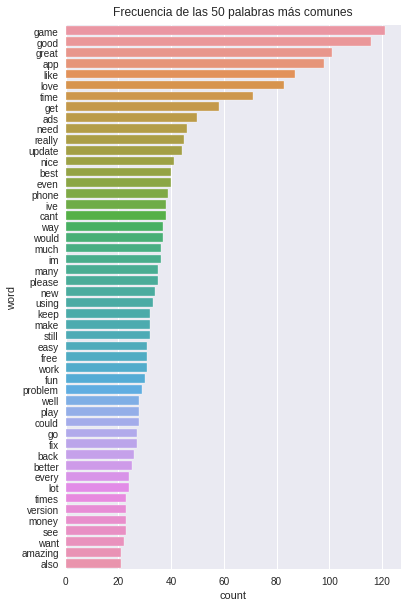

In [163]:
most_common_50 = pd.DataFrame(freq_dist_no_stop_words.most_common(50), columns = ['word', 'count'])
fig = plt.figure(figsize = (6, 10))
ax = fig.add_subplot()
sns.barplot(data = most_common_50, y = 'word', x = 'count', ax = ax);
ax.set_title('Frecuencia de las 50 palabras más comunes', pad = 10);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



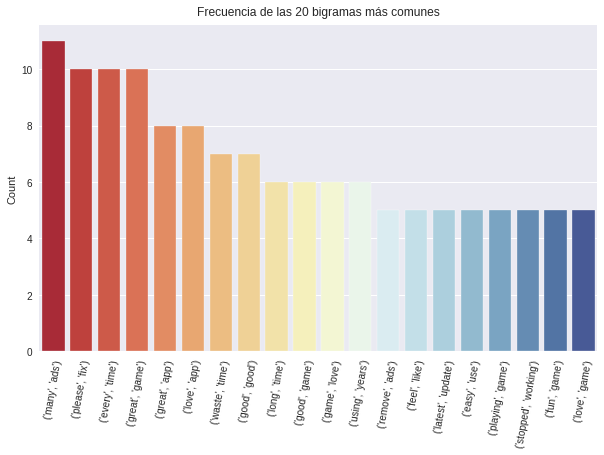

In [164]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

sns.barplot(x = most_common_20[:, 0], y = most_common_20[:, 1], ax = ax, palette = 'RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad = 10)
ax.set_ylabel('Count')
ax.tick_params(axis = 'x', rotation = 80);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



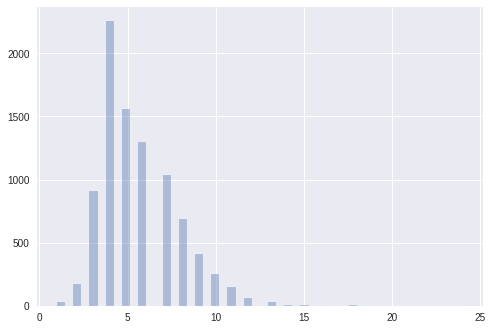

In [165]:
word_lengths = [len(w) for w in all_words_except_stop_words]
sns.distplot(x = word_lengths, kde = False, norm_hist = False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



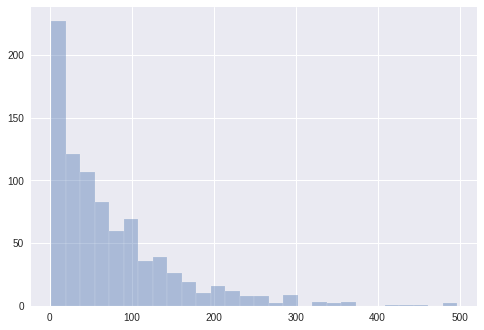

In [166]:
sentence_lengths = grouped_by_app.apply(lambda x: len(x));
sns.distplot(x = sentence_lengths, kde = False, norm_hist = False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



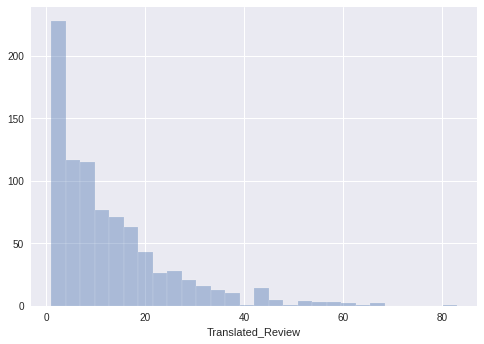

In [167]:
num_of_words = grouped_by_app.str.split(' ').str.len()
sns.distplot(num_of_words, kde = False, norm_hist = False);

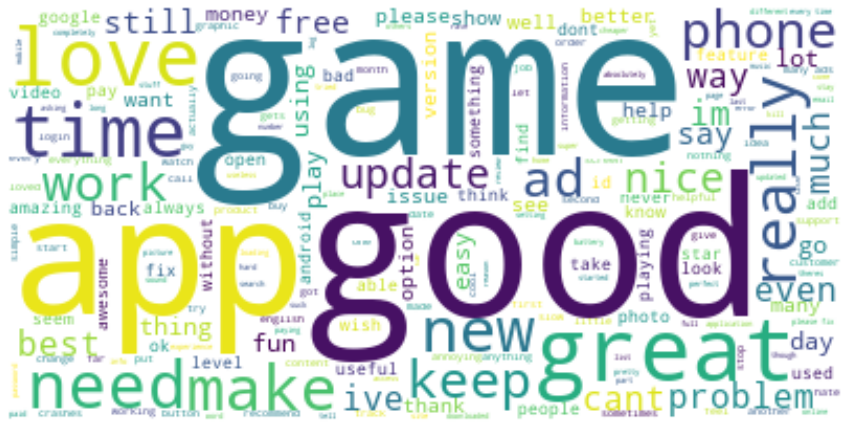

In [168]:
wordcloud = WordCloud(max_font_size = 100, background_color = "white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [169]:
analizador = SentimentIntensityAnalyzer()

In [176]:
df_google['analisis'] = df_google['Translated_Review'].apply(lambda x:analizador.polarity_scores(x)['compound'])
df_google.sort_values('Sentiment_Polarity', ascending = False)

Translated_Review  ... analisis
App                                                                                                    ...         
10 Best Foods for You                               I like eat delicious food. That's I'm cooking ...  ...   0.9531
CMB Free Dating App                                                                            Great!  ...   0.6588
CMB Free Dating App                                                             Best dating app/site.  ...   0.6369
CM Locker - Security Lockscreen                                      I think best screen locker apps.  ...   0.6369
CM Locker - Security Lockscreen                     It goo app.cm secuirty best lockscreen secuirety.  ...   0.6369
...                                                                                               ...  ...      ...
Hide App, Private Dating, Safe Chat - PrivacyHider                             Very worst I ever used  ...  -0.6590
Candy Camera - selfie, beauty camera, photo editor                                    This worst life  ...  -0.6249
Fashion in Vogue                                                   terrible, doesnt load, uninstalled  ...  -0.4767
Candy Camera - selfie, beauty camera, photo editor                Worst app...not work Lenovo k8 plus  ...  -0.6249
Amtrak                                                             Horrible - button clicks even work  ...  -0.5423

[37427 rows x 5 columns]

## Postwork 8.

Si hay un problema de clasificación binaria en tu proyecto, ¡genial! Aplica lo aprendido en esta sesión y entrena un modelo de Regresión Logística con tu dataset.

En los problemas que tuvimos poner: No se pudo tener un mejor modelo porque algunos datos no eran numéricos.

In [104]:
df_final['enfermedad_cardiovascular'].unique()

array([0, 1])

In [105]:
X = df_final.drop(columns = ['enfermedad_cardiovascular'])
y = df_final['enfermedad_cardiovascular']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [107]:
logreg = LogisticRegression(max_iter = 10000)

In [108]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [110]:
logreg.score(X_test, y_test)

0.7227107837748709

Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.

In [111]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[7300, 1931],
       [3114, 5849]])

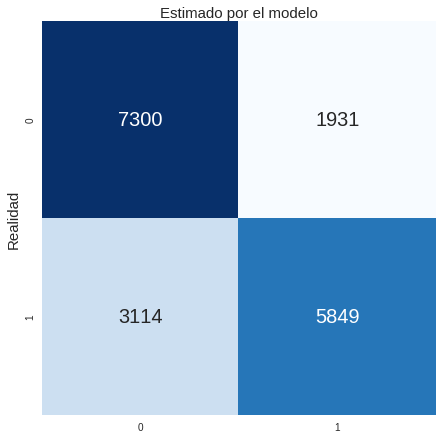

In [112]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [113]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7517994858611825
Exactitud: 0.7227107837748709
Sensibilidad: 0.6525716835880844
Especificidad: 0.7908135629942584


In [114]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.50817445, 0.49182555],
       [0.60610322, 0.39389678],
       [0.45151667, 0.54848333],
       [0.35935505, 0.64064495],
       [0.3788582 , 0.6211418 ],
       [0.6774938 , 0.3225062 ],
       [0.64869589, 0.35130411],
       [0.82556706, 0.17443294],
       [0.43083836, 0.56916164],
       [0.11253373, 0.88746627]])

In [115]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

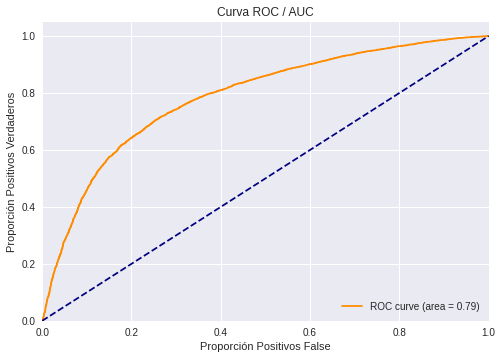

In [116]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

#### 2

In [117]:
var_categoricas_2 = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica']
df_sin_categoricas = df_final.drop(columns = var_categoricas_2)

In [118]:
X = df_sin_categoricas.drop(columns = ['enfermedad_cardiovascular'])
y = df_sin_categoricas['enfermedad_cardiovascular']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [120]:
logreg = LogisticRegression(max_iter = 10000)

In [121]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
logreg.score(X_test, y_test)

0.7128174123337364

In [124]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[7271, 1976],
       [3249, 5698]])

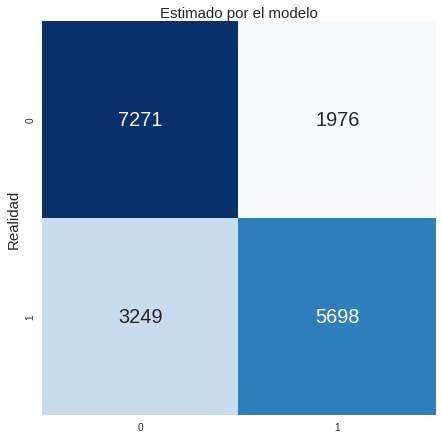

In [125]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [126]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7425071670575971
Exactitud: 0.7128174123337364
Sensibilidad: 0.6368615178272047
Especificidad: 0.786309073212934


In [127]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.54683894, 0.45316106],
       [0.58142922, 0.41857078],
       [0.2203086 , 0.7796914 ],
       [0.14619546, 0.85380454],
       [0.19315011, 0.80684989],
       [0.88663529, 0.11336471],
       [0.71898915, 0.28101085],
       [0.03915227, 0.96084773],
       [0.73760451, 0.26239549],
       [0.37602218, 0.62397782]])

In [128]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

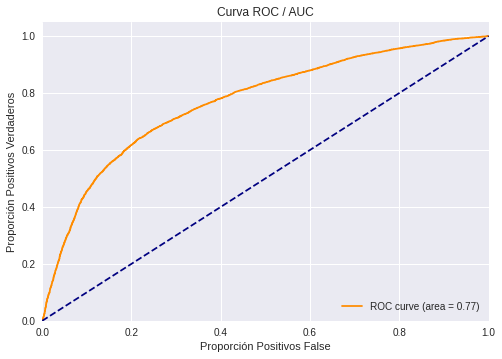

In [129]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()